# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 6 de octubre, 2020 23:59
</div>

In [1]:
from sympy import *
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['array', 'invert', 'beta', 'trunc', 'sinc', 'exp', 'ifft', 'mod', 'add', 'reshape', 'binomial', 'Circle', 'diag', 'cos', 'power', 'sqrt', 'det', 'source', 'maximum', 're', 'gamma', 'eye', 'trace', 'nan', 'vectorize', 'transpose', 'test', 'multinomial', 'plot', 'Polygon', 'cosh', 'gcd', 'sin', 'Number', 'solve', 'lcm', 'seterr', 'prod', 'sign', 'product', 'ones', 'poly', 'minimum', 'floor', 'partition', 'conjugate', 'zeros', 'deprecated', 'plotting', 'var', 'interactive', 'tanh', 'sinh', 'log', 'pi', 'fft', 'tan', 'Line2D', 'diff', 'cbrt', 'flatten', 'take', 'roots']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

In [2]:
from sympy import *
J = Function("J")
b0 = Symbol("beta0")
b1 = Symbol("beta1")
b = Symbol("beta")
bj = Symbol("beta_j")
m = Symbol ("m")
n = Symbol ("n")
y = Symbol ("y")
i = Symbol ("i")
j = Symbol ("j")
x = Symbol ("x")


suma = Sum((Indexed(y,i)-b0-b1*Indexed(x,i))**2,(i,1,m))

Costo= Eq(J(b0,b1), 1/(2*m)*suma)

Costo

Eq(J(beta0, beta1), Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, m))/(2*m))

In [ ]:
Parcial1 = Eq(Derivative(Costo.lhs,b0),Derivative(Costo.rhs,b0)).doit()
simplify(Parcial1)

In [ ]:
Parcial2 = Eq(Derivative(Costo.lhs,b1),Derivative(Costo.rhs,b1)).doit()
simplify(Parcial2)

#### En general

In [ ]:
subsuma = Sum(Indexed(b,j)*Indexed(x,j),(j,0,n))
sumag = Sum((Indexed(y,i)-subsuma)**2,(i,1,m))

Costog = Eq(J(b),1/(2*m)*sumag)

In [ ]:
subsuma

In [ ]:
sumag

In [ ]:
Costog

In [ ]:
Parcialj = Eq(Derivative(Costog.lhs,b0),Derivative(Costog.rhs,b0)).doit()
simplify(Parcialj)

In [ ]:
Derivative(Costog.lhs,bj)

In [ ]:
Derivative(Costog.rhs,bj)

# Problema 2

https://scipython.com/blog/visualizing-the-gradient-descent-method/
https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html

In [3]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia, que tanto nos estamos acercando
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while self.i < self.max_iters:     
            # Actualizamos beta (con la formula de betaj)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            #En el if estamos checando la convergencia
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), self.i ))
                self.breaking_iteration = self.i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        #Producto punto
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        #La diferencia
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    
    
def Graficar(x,y, R):
    """
    R es el objeto Regresion Lineal
    """
    modelo = lambda x,b,m: b + m*x
    iteracion = R.i-1
    Beta = R.historia['beta'][iteracion]
    plt.scatter(x,y, label="Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]))

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [56]:
edad = np.loadtxt('data/edad.dat')
altura = np.loadtxt('data/altura.dat')

P2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.00001)
P2.gradientDescent(edad, altura)


La función convergió con beta: [0.20538735 0.16299624] en la iteración 868


In [95]:
beta0 = []
beta1 = []
for k in range(len(P2.historia["beta"])):
    beta0.append(P2.historia["beta"][k][0])
    beta1.append(P2.historia["beta"][k][1])
costo = P2.historia["costo"]

"""
X, Y = np.meshgrid(beta0, beta1) #Producto cruz entre los vectores

def f(x,y):
    return x+y

Z = f(X,Y)
"""

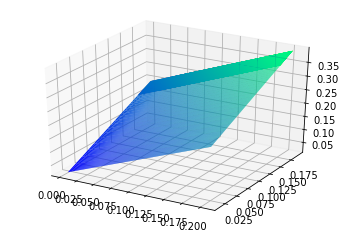

In [96]:
"""
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
"""

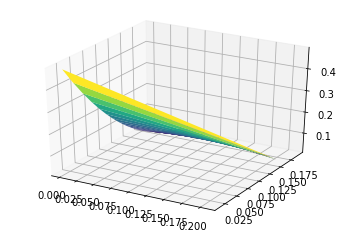

In [98]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(beta0, beta1, costo,
                cmap='viridis', edgecolor='none');

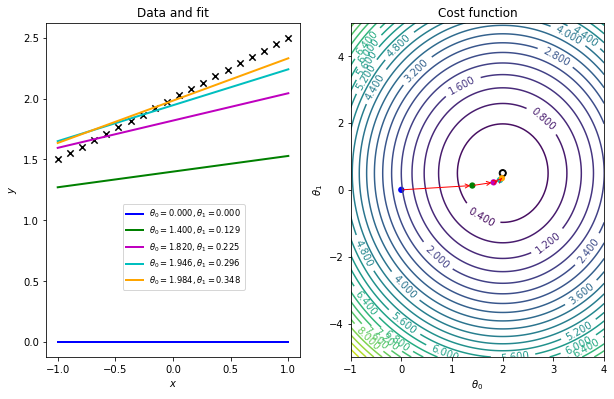

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6.15))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum(
                                    (hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data and fit')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.1*axbox.height),
             fontsize='small')


**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.



**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

# Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [ ]:
%cat data/chirps.txt

In [ ]:
datos = np.loadtxt('data/chirps.txt', dtype="float", delimiter="\t", skiprows=1)
X = datos[:,0]
Y = datos[:,1]
plt.scatter(X,Y)
plt.xlabel('Chirps')
plt.ylabel('Second')

In [ ]:
r = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
r.gradientDescent(X, Y)

In [ ]:
Graficar(X,Y,r)

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


# Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [ ]:
Anscombe = np.loadtxt("data/quartet.txt", dtype="float", delimiter=",", skiprows=1)

In [ ]:
A1 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A1.gradientDescent(Anscombe[:,0], Anscombe[:,1])

In [ ]:
Graficar(Anscombe[:,0], Anscombe[:,1], A1)

In [ ]:
A2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A2.gradientDescent(Anscombe[:,2], Anscombe[:,3])

In [ ]:
Graficar(Anscombe[:,2], Anscombe[:,3], A2)

In [ ]:
A3 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A3.gradientDescent(Anscombe[:,4], Anscombe[:,5])

In [ ]:
Graficar(Anscombe[:,4], Anscombe[:,5], A3)

In [ ]:
A4 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A4.gradientDescent(Anscombe[:,6], Anscombe[:,7])

In [ ]:
Graficar(Anscombe[:,6], Anscombe[:,7], A4)

# Problema 5

Use el archivo `radioactive_decay.dat`

In [ ]:
%cat data/radioactive_decay.txt

**(a)** Grafique los datos ¿Qué forma tienen?

In [ ]:
datos2 = np.loadtxt('data/radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=1)
time = datos2[:,0]
N = datos2[:,1]
plt.scatter(time,N)
plt.xlabel('Time')
plt.ylabel('Remaining')

In [ ]:
radioactive = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
radioactive.gradientDescent(time,N)

In [ ]:
Graficar(time, N, radioactive)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

In [ ]:
#Es similar a un modelo exponencial, así que aplicamos log
N2 = np.log(N)
plt.scatter(time, N2)

In [ ]:
data = np.append(time, N2)

data = data.reshape(int(len(data)/2),2, order="F")

np.savetxt("transform_radioactive_decay.txt",data, delimiter="\t")


In [ ]:
#%cat transform_radioactive_decay.txt

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [ ]:
datos3 = np.loadtxt('transform_radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=0)
time2 = datos3[:,0]
N2 = datos3[:,1]
plt.scatter(time2,N2)
plt.xlabel('Time')
plt.ylabel('Remaining')

In [ ]:
radio = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
radio.gradientDescent(time2,N2)

In [ ]:
Graficar(time2, N2, radio)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son en el espacio sin transformar? Explique.

In [ ]:
Beta1 = radioactive.historia['beta'][radioactive.i-1]
Beta2 = radio.historia['beta'][radio.i-1]


In [ ]:
Beta1

In [ ]:
Beta2